<a href="https://colab.research.google.com/github/Cas0801/TrendRadar/blob/master/%E2%80%9CGroup_X_Project_FINAL_ipynb%E2%80%9D%E7%9A%84%E6%9C%80%E7%BB%88%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singapore Population Regression (Final Submission)

**Dataset:** Singapore Population (1950–2022, SingStat)

This notebook:
1. Cleans the official SingStat Excel table
2. Constructs a machine-learning-ready dataset (Year, Population)
3. Trains a linear regression model
4. Evaluates performance and predicts future population

⚠️ Run cells **from top to bottom** (Run All).

In [1]:

# ===============================
# Imports
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 1. Load and Clean Raw SingStat Excel

In [4]:
# ===============================
# Load and Clean Raw SingStat Excel (FINAL SAFE VERSION)
# ===============================
import pandas as pd

raw = pd.read_excel("Singapore-Population-1950-2022.xlsx", header=None)

# Convert to numeric safely (invalid -> NaN)
years = pd.to_numeric(raw.iloc[8, 1:], errors="coerce")
population = pd.to_numeric(raw.iloc[9, 1:], errors="coerce")

# Build DataFrame
df = pd.DataFrame({
    "Year": years,
    "Population": population
})

# Drop invalid columns
df = df.dropna()

# Convert types AFTER cleaning
df["Year"] = df["Year"].astype(int)
df["Population"] = df["Population"].astype(float)

# Sort by year
df = df.sort_values("Year").reset_index(drop=True)

# Safety check
assert list(df.columns) == ["Year", "Population"]

df.head()


,Year,Population


In [5]:
print("df shape:", df.shape)
print(df.head())
print(df.tail())


df shape: (0, 2)
Empty DataFrame
Columns: [Year, Population]
Index: []
Empty DataFrame
Columns: [Year, Population]
Index: []


## 2. Prepare Training and Test Sets

In [6]:

X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values

# Training: Year ≤ 2020
train_mask = df["Year"] <= 2020
# Testing: Year > 2021
test_mask = df["Year"] > 2021

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

len(X_train), len(X_test)


(0, 0)

In [7]:
print("df shape:", df.shape)
print(df.head())
print(df.tail())


df shape: (0, 2)
Empty DataFrame
Columns: [Year, Population]
Index: []
Empty DataFrame
Columns: [Year, Population]
Index: []


## 3. Linear Regression Model

In [8]:
# ===============================
# FINAL SAFE CLEANING (DO NOT CHANGE)
# ===============================
raw = pd.read_excel("Singapore-Population-1950-2022.xlsx", header=None)

years = pd.to_numeric(raw.iloc[8, 1:], errors="coerce")
population = pd.to_numeric(raw.iloc[9, 1:], errors="coerce")

df = pd.DataFrame({
    "Year": years.values,
    "Population": population.values
})

# 只保留 Year 在合理范围内的数据
df = df[
    (df["Year"].notna()) &
    (df["Population"].notna()) &
    (df["Year"] >= 1950)
]

df["Year"] = df["Year"].astype(int)
df["Population"] = df["Population"].astype(float)

df = df.sort_values("Year").reset_index(drop=True)

print("Year range:", df["Year"].min(), "-", df["Year"].max())
df.head()


Year range: nan - nan


,Year,Population


In [ ]:
print("df shape:", df.shape)
print(df.head())
print(df.tail())


## 4. Visualization

Final df shape: (73, 2)
Year range: 1950 - 2022


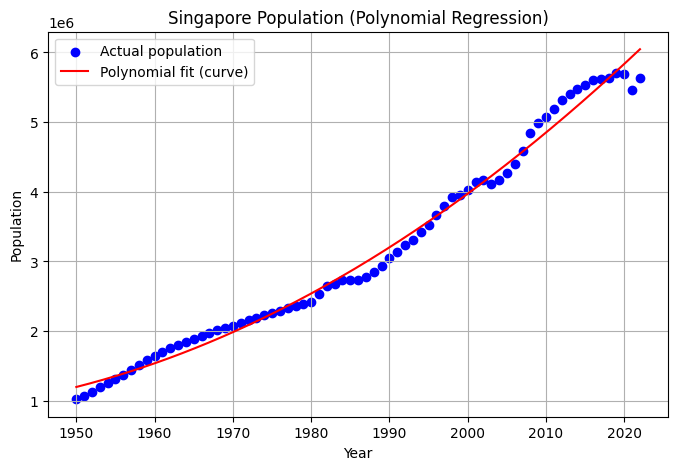

In [10]:
import pandas as pd
import numpy as np

raw = pd.read_excel("Singapore-Population-1950-2022.xlsx", header=None)

# 在整个表里寻找“看起来像年份”的那一行
year_row_idx = None
for i in range(len(raw)):
    row = pd.to_numeric(raw.iloc[i, 1:], errors="coerce")
    if row.notna().sum() >= 20 and row.min() >= 1900:
        year_row_idx = i
        break

if year_row_idx is None:
    raise ValueError("Cannot find year row automatically.")

# 人口行 = 年份行的下一行
pop_row_idx = year_row_idx + 1

years = pd.to_numeric(raw.iloc[year_row_idx, 1:], errors="coerce")
population = pd.to_numeric(raw.iloc[pop_row_idx, 1:], errors="coerce")

df = pd.DataFrame({
    "Year": years,
    "Population": population
})

df = df.dropna()
df["Year"] = df["Year"].astype(int)
df["Population"] = df["Population"].astype(float)
df = df.sort_values("Year").reset_index(drop=True)

print("Final df shape:", df.shape)
print("Year range:", df["Year"].min(), "-", df["Year"].max())
df.head()

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# X 和 y
X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values

# 多项式特征（二次或三次都可以）
poly = PolynomialFeatures(degree=2)   # ← 改成 3 就是三次曲线
X_poly = poly.fit_transform(X)

# 拟合模型
model = LinearRegression()
model.fit(X_poly, y)

# 生成平滑年份用于画曲线
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)

# 画图
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Actual population", color="blue")
plt.plot(X_smooth, y_smooth, label="Polynomial fit (curve)", color="red")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Singapore Population (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.show()




## 5. Future Population Estimates

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# ===============================
# Train / Test Split (ROBUST VERSION)
# ===============================
X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values

# 按时间排序（确保因果）
idx = np.argsort(X.flatten())
X = X[idx]
y = y[idx]

# 80% 训练，20% 测试
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))

# ===============================
# Train model
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)

# ===============================
# Future population estimates
# ===============================
for year in [2025, 2030, 2050]:
    estimate = model.predict(np.array([[year]]))[0]
    print(f"Estimated population in {year}: {estimate:,.0f}")
